In [1]:
# Install packages using PyPI
!pip install pandas
!pip install numpy
!pip install opendatasets
!pip install matplotlib
!pip install scikit-image
!pip install -U ultralytics
!pip install opencv-python


  Using cached ultralytics-8.3.94-py3-none-any.whl.metadata (35 kB)
  Using cached ultralytics_thop-2.0.14-py3-none-any.whl.metadata (9.4 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.2.1.3-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.5.147-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.6.1.9-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.3.1.170-py3-none-manylinux2014_x86_64.whl.m

In [43]:
# Import libraries
from google.colab import drive
import warnings
from sklearn.exceptions import ConvergenceWarning
import shutil
import opendatasets as od
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
from matplotlib.image import imread
import matplotlib.image as mpimg
import os
import hashlib
import os.path
import cv2
import string
import re
from pathlib import Path
import ultralytics
from ultralytics import YOLO
from google.colab import files
from google.colab.patches import cv2_imshow
import tensorflow as tf
from keras.preprocessing import image
from tensorflow.keras.callbacks import EarlyStopping, Callback
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import load_model
from keras.losses import *
from tensorflow.keras import *
import yaml

In [3]:
# CAR PLATES PROCESSOR
### Create an algorithm to read car plates
# URL of the Kaggle dataset
url_data = "https://www.kaggle.com/datasets/mirzamahfujhossain/bangla-license-plate-dataset-with-annotations/data"
# Download the dataset from Kaggle
od.download(url_data, force=True)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: anarubioarevalo
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/mirzamahfujhossain/bangla-license-plate-dataset-with-annotations


100%|██████████| 1.07G/1.07G [00:04<00:00, 282MB/s] 


In [4]:
# Create directories for test, train, valid
os.makedirs("/content/drive/MyDrive/Dataset_plates/",exist_ok=True)
os.makedirs("/content/drive/MyDrive/Dataset_plates/",exist_ok=True)
os.makedirs("/content/drive/MyDrive/Dataset_plates/",exist_ok=True)

In [5]:
# Move test, train, valid folders
shutil.move("/content/bangla-license-plate-dataset-with-annotations/Bangla License Plate Dataset with annotations/Bangla License Plate Dataset with annotations/test","/content/drive/MyDrive/Dataset_plates/")
shutil.move("/content/bangla-license-plate-dataset-with-annotations/Bangla License Plate Dataset with annotations/Bangla License Plate Dataset with annotations/train","/content/drive/MyDrive/Dataset_plates/")
shutil.move("/content/bangla-license-plate-dataset-with-annotations/Bangla License Plate Dataset with annotations/Bangla License Plate Dataset with annotations/valid","/content/drive/MyDrive/Dataset_plates/")

'/content/drive/MyDrive/Dataset_plates/valid'

In [6]:
"""
# Delete a folder in Colab and also the folder is deleted in Google Drive
shutil.rmtree("/content/drive/MyDrive/Dataset_plates")
"""

'\n# Delete a folder in Colab and also the folder is deleted in Google Drive\nshutil.rmtree("/content/drive/MyDrive/Dataset_plates")\n'

In [7]:
"""
drive.mount("/content/drive", force_remount=True)
# Ignore covergence warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)
"""

'\ndrive.mount("/content/drive", force_remount=True)\n# Ignore covergence warnings\nwarnings.filterwarnings("ignore", category=ConvergenceWarning)\n'

In [8]:
os.listdir("/content/drive/MyDrive/Dataset_plates")

['valid', 'test', 'train']

In [9]:
# List of directories and files in the specified path
print(os.listdir("/content/drive/MyDrive/Dataset_plates/train/images"))

['IMG_20190413_122349_129_1_jpg.rf.46af0bb9379a75ef19696317c08b17b9.jpg', 'noisen2439.jpg', 'noisen2225.jpg', 'noisen851.jpg', '2212.jpg', 'noisen2458.jpg', 'car-3026_36_1_jpg.rf.3d4e390537f5402a43a5ac64b355d3e4.jpg', 'car-3240_1473_1_jpg.rf.1d3955e594337dae2b3600997a15ef79.jpg', '151665421_301349461324233_4237386951681230651_n_720_1_jpg.rf.cffccec8ca955d5e9efdb9e29720712d.jpg', 'n713.jpg', 'n503.jpg', 'car-5083_181_1_jpg.rf.dd3728407115045a08153061b0fb6b45.jpg', '1265.jpg', '1561.jpg', 'car-1061_497_1_jpg.rf.cd5a66c52d021df51d82d3b157679f64.jpg', 'IMG_20190413_121855_421_1_jpg.rf.0aeb16f1c442f05941a7bd9fc07fe19f.jpg', '1307.jpg', 'n1925.jpg', 'car-3069_367_1_jpg.rf.f41671093cbd260dd3a9867668391d0c.jpg', 'n1661.jpg', 'n1073.jpg', 'IMG_20191220_160218_355_1_jpg.rf.b0490863876ec1f1f088cc9c96c7ff0c.jpg', 'noisen1837.jpg', '1447.jpg', 'car-3203_1807_1_jpg.rf.049f104425cf34e5d27bb5cd8e24d7ae.jpg', 'car-5053_1479_1_jpg.rf.7aa1ca36b9a8838dac89483ed554ccd9.jpg', 'blurn538.jpg', 'noisen1920.jpg

In [10]:
# Number of files in the specified path
print(len([name for name in os.listdir("/content/drive/MyDrive/Dataset_plates/train/images") if os.path.isfile(os.path.join("/content/drive/MyDrive/Dataset_plates/train/images", name))]))

12680


In [11]:
# List of directories and files in the specified path
print(os.listdir("/content/drive/MyDrive/Dataset_plates/train/labels"))

['car-6075_373_1_jpg.rf.292785a0ca6f8a6b38d920213d0d7759.txt', 'noisen1121.txt', '1752.txt', 'car-2063_384_1_jpg.rf.47a3b72eb7ddad23499dca384e5916f4.txt', 'n2228.txt', 'blurn2295.txt', 'car-3105_1772_1_jpg.rf.fab7fa9880ec853ce1d3ebe79a30dbac.txt', 'noisen1368.txt', 'noisen2215.txt', 'IMG_20191220_153151_583_1_jpg.rf.489556668723af78b471662104665192.txt', 'IMG_20191220_152937_1333_1_jpg.rf.166ea723485f58e7afc20ee34f539c73.txt', '1702.txt', '1167.txt', 'n1527.txt', 'n1529.txt', 'n1576.txt', '964.txt', 'IMG_20190412_114719_155_1_jpg.rf.540c5086897832635b37273f1234b27a.txt', 'blurn1192.txt', 'n1665.txt', '1519.txt', 'noisen2321.txt', 'car-1015_160_1_jpg.rf.7ed7e207dc70ad80ba5ce3954b240435.txt', 'noisen2152.txt', 'blurn1328.txt', 'car-6352_952_1_jpg.rf.c233f2c5dd1a8a45d9ace9a2f01fc569.txt', '69_259_1_jpg.rf.9e8059a2f4314c56db67c09c9d1c8326.txt', '2227.txt', 'noisen1395.txt', 'n1962.txt', 'blurn564.txt', 'car-1018_315_1_jpg.rf.e824394c249651ebf20853af0242f9fa.txt', '2201.txt', 'car-3287_666_

In [12]:
# Number of files in the specified path
print(len([name for name in os.listdir("/content/drive/MyDrive/Dataset_plates/train/labels") if os.path.isfile(os.path.join("/content/drive/MyDrive/Dataset_plates/train/labels", name))]))

12680


There are 12680 train images and 12680 label files.

In [13]:
# Function to check if files duplicates
def hashfile(file_path):
    hasher = hashlib.sha256()
    with open(file_path, 'rb') as f:
        buf = f.read()
        hasher.update(buf)
    return hasher.hexdigest()
# Check if there are train image duplicates
imagthashes = pd.DataFrame(columns=["filename","hash"])
imagthashes_dup = pd.DataFrame(columns=["filename","hash"])
imagt_dir = "/content/drive/MyDrive/Dataset_plates/train/images/"
for filename in Path(imagt_dir).glob("*.jpg"):
  if filename.is_file():
    file_hash = hashfile(filename)
    if (imagthashes["hash"] != file_hash).all():
      imagthashes.loc[len(imagthashes)] = [os.path.basename(filename), file_hash]
    else:
      imagthashes_dup.loc[len(imagthashes_dup)] = [os.path.basename(filename), file_hash]
if imagthashes_dup.empty:
  print("Not duplicate train images in the dataset.")
else:
    print(f'The number of duplicate train images in the dataset is: {imagthashes_dup.shape[0]}')

The number of duplicate train images in the dataset is: 69


In [14]:
print(imagthashes_dup["filename"])

0     car-1044_1714_1_jpg.rf.0f85eb3cecbbb4abeaa412b...
1                                              1195.jpg
2     74_95_1_jpg.rf.3240e63daecb740be7631fc5e1aab70...
3                                              n383.jpg
4                                          blurn405.jpg
                            ...                        
64    car-3244_1685_1_jpg.rf.a88da7f62a387719c2ac191...
65    152901014_464676198057710_2202338660908418999_...
66    car-3104_900_1_jpg.rf.7b8e707f2f874332332f4d93...
67    car-5058_1847_1_jpg.rf.8172fc2163cf01da6a894c5...
68    Navid_426_1451_1_jpg.rf.c24ec7398335a60f423fb3...
Name: filename, Length: 69, dtype: object


In [15]:
# Check if there are train labels duplicates
labelthashes = pd.DataFrame(columns=["filename","hash"])
labelthashes_dup = pd.DataFrame(columns=["filename","hash"])
# Check if there are image duplicates
labelst_dir = "/content/drive/MyDrive/Dataset_plates/train/labels/"
for filename in Path(labelst_dir).glob("*.txt"):
  if filename.is_file():
    file_hash = hashfile(filename)
    if (labelthashes["hash"] != file_hash).all():
      labelthashes.loc[len(labelthashes)] = [filename, file_hash]
    else:
      labelthashes_dup.loc[len(labelthashes_dup)] = [filename, file_hash]
if labelthashes_dup.empty:
  print("Not duplicate train labels in the dataset.")
else:
    print(f'The number of duplicate train labels in the dataset is: {labelthashes_dup.shape[0]}')


The number of duplicate train labels in the dataset is: 7202


In [16]:
# Print the first 5 duplicate train labels
hashes_l = {}
dup_l = 0
for filename in os.listdir(labelst_dir):
  path = os.path.join(labelst_dir, filename)
  if not os.path.isfile(path):
    continue
  file_hash = hashfile(path)
  if file_hash not in hashes_l:
    hashes_l[file_hash] = path
  else:
    if dup_l<5:
      print(f'Duplicate found: {path} and {hashes_l[file_hash]}')
    dup_l +=1
if dup_l==0:
  print('Not images duplicates in the dataset.')

Duplicate found: /content/drive/MyDrive/Dataset_plates/train/labels/blurn2215.txt and /content/drive/MyDrive/Dataset_plates/train/labels/noisen2215.txt
Duplicate found: /content/drive/MyDrive/Dataset_plates/train/labels/blurn1665.txt and /content/drive/MyDrive/Dataset_plates/train/labels/n1665.txt
Duplicate found: /content/drive/MyDrive/Dataset_plates/train/labels/blurn1368.txt and /content/drive/MyDrive/Dataset_plates/train/labels/noisen1368.txt
Duplicate found: /content/drive/MyDrive/Dataset_plates/train/labels/blurn1856.txt and /content/drive/MyDrive/Dataset_plates/train/labels/n1856.txt
Duplicate found: /content/drive/MyDrive/Dataset_plates/train/labels/noisen726.txt and /content/drive/MyDrive/Dataset_plates/train/labels/n726.txt


The label n383 and the label n388 are duplicate.

In [17]:
# Print the n383.txt file
with open('/content/drive/MyDrive/Dataset_plates/train/labels/n383.txt', 'r', encoding='utf-8') as text_file:
    # Read the content of the file
    text = text_file.read()
    # Print the content of the file
    print(text)

44 0.270362 0.290493 0.169683 0.362676
10 0.471719 0.286972 0.237557 0.390845
15 0.701357 0.301056 0.113122 0.341549



In [18]:
# Print the n388.txt file
with open('/content/drive/MyDrive/Dataset_plates/train/labels/n388.txt', 'r', encoding='utf-8') as text_file:
    # Read the content of the file
    text = text_file.read()
    # Print the content of the file
    print(text)

44 0.274887 0.276408 0.169683 0.362676
10 0.472851 0.288732 0.239819 0.380282
15 0.702489 0.297535 0.110860 0.278169



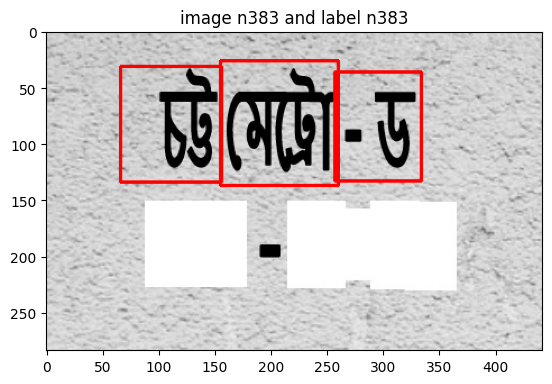

In [19]:
# Plot the image and the bounding boxes for image n383 and label n383
image = cv2.imread('/content/drive/MyDrive/Dataset_plates/train/images/n383.jpg')
image_hight = image.shape[0]
image_width = image.shape[1]
filename = "/content/drive/MyDrive/Dataset_plates/train/labels/n383.txt"
with open(filename, 'r', encoding='utf-8') as f:
  text_list = [list(map(float, line.strip().split())) for line in f]
for i in range(3):
    x0 = text_list[i][1] - text_list[1][3] / 2
    x1 = text_list[i][1] + text_list[i][3] / 2
    y0 = text_list[i][2] - text_list[i][4] / 2
    y1 = text_list[i][2] + text_list[i][4] / 2
    start_point = (int(x0*image_width), int(y0*image_hight))
    end_point = (int(x1*image_width), int(y1*image_hight))
    img = cv2.rectangle(image, start_point, end_point, color=(255, 0, 0), thickness=2)
    plt.imshow(img)
    plt.title("image n383 and label n383")
plt.show()

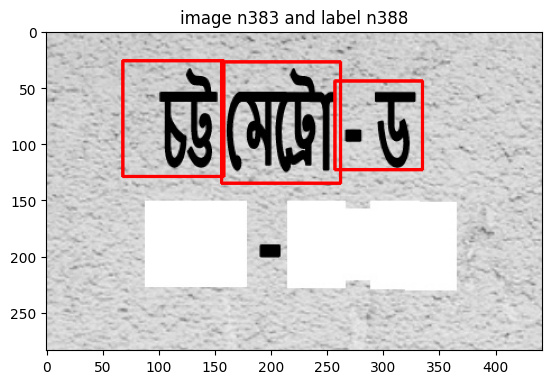

In [20]:
# Plot the image and the bounding boxes for image n383 and label n388
image = cv2.imread('/content/drive/MyDrive/Dataset_plates/train/images/n383.jpg')
image_hight = image.shape[0]
image_width = image.shape[1]
filename = "/content/drive/MyDrive/Dataset_plates/train/labels/n388.txt"
with open(filename, 'r', encoding='utf-8') as f:
  text_list = [list(map(float, line.strip().split())) for line in f]
for i in range(3):
    x0 = text_list[i][1] - text_list[1][3] / 2
    x1 = text_list[i][1] + text_list[i][3] / 2
    y0 = text_list[i][2] - text_list[i][4] / 2
    y1 = text_list[i][2] + text_list[i][4] / 2
    start_point = (int(x0*image_width), int(y0*image_hight))
    end_point = (int(x1*image_width), int(y1*image_hight))
    img = cv2.rectangle(image, start_point, end_point, color=(255, 0, 0), thickness=2)
    plt.imshow(img)
    plt.title("image n383 and label n388")
plt.show()

In [21]:
# Print the first 5 duplicate valid images
vimag_dir="/content/drive/MyDrive/Dataset_plates/valid/images"
def hashfile(file_path):
    hasher = hashlib.sha256()
    with open(file_path, 'rb') as f:
        buf = f.read()
        hasher.update(buf)
    return hasher.hexdigest()
hashes_vimag = {}
dup_vimag = 0
for filename in os.listdir(vimag_dir):
  path = os.path.join(vimag_dir, filename)
  if not os.path.isfile(path):
    continue
  file_hash = hashfile(path)
  if file_hash not in hashes_vimag:
    hashes_vimag[file_hash] = path
  else:
    if dup_vimag<5:
      print(f'Duplicate found: {path} and {hashes_vimag[file_hash]}')
    dup_vimag +=1
if dup_vimag==0:
  print('Not valid images duplicates in the dataset.')

Not valid images duplicates in the dataset.


In [22]:
# Create a directory for the duplicate images and other directory for the duplicate labels
os.makedirs("/content/drive/MyDrive/Dataset_plates/imagesdup",exist_ok=True)
os.makedirs("/content/drive/MyDrive/Dataset_plates/labelsdup",exist_ok=True)

In [23]:
# Create the list of the duplicate train images
listdup_timag = imagthashes_dup['filename'].to_list()
print(listdup_timag)

['car-1044_1714_1_jpg.rf.0f85eb3cecbbb4abeaa412bc4c92daec.jpg', '1195.jpg', '74_95_1_jpg.rf.3240e63daecb740be7631fc5e1aab709.jpg', 'n383.jpg', 'blurn405.jpg', '379.jpg', 'blurn415.jpg', 'car-3072_256_1_jpg.rf.ad4fa54632b29cfc9fdac023378b9714.jpg', '455.jpg', 'IMG_20191220_155342_1798_1_jpg.rf.97e73737663a48d7cdc40c09975052ed.jpg', 'car-6272_1846_1_jpg.rf.407300b0655c9d1cd6666a076c9ce4bb.jpg', 'n1193.jpg', 'car-3018_1573_1_jpg.rf.dce734b12a47a5cd48b1b43061cb0757.jpg', 'car-6078_1053_1_jpg.rf.679aca0a07e65cb50a31807f1bfd0aaf.jpg', 'car-1030_1420_1_jpg.rf.cce003cd6a907418659ad6901934b72b.jpg', '1194.jpg', 'car-2020_329_1_jpg.rf.0ae7c90e113b84d3a27525cbd7f900e4.jpg', 'car-3206_70_1_jpg.rf.b44867e488cf23c443db8b0b95d31838.jpg', 'blurn1194.jpg', 'n1069.jpg', 'IMG_20190413_122543_60_1_jpg.rf.758b74a3ed4de48374885d3132b4f42d.jpg', 'n394.jpg', 'blurn390.jpg', 'IMG_20190412_112326_428_1_jpg.rf.5f31956dc717025de906627def053a96.jpg', 'car-6130_242_1_jpg.rf.7e90339a95317621f9812e1db6dca4fb.jpg', '4

In [24]:
# Move the duplicate train images
destination_imag="/content/drive/MyDrive/Dataset_plates/imagesdup"
for filename in os.listdir("/content/drive/MyDrive/Dataset_plates/train/images"):
  if filename in listdup_timag:
    file_path=os.path.join("/content/drive/MyDrive/Dataset_plates/train/images/", filename)
    shutil.move(file_path, os.path.join(destination_imag, filename))

In [25]:
# List of train images without duplicates
list_timag =(os.listdir("/content/drive/MyDrive/Dataset_plates/train/images"))
print(list_timag)

['IMG_20190413_122349_129_1_jpg.rf.46af0bb9379a75ef19696317c08b17b9.jpg', 'noisen2439.jpg', 'noisen2225.jpg', 'noisen851.jpg', '2212.jpg', 'noisen2458.jpg', 'car-3026_36_1_jpg.rf.3d4e390537f5402a43a5ac64b355d3e4.jpg', 'car-3240_1473_1_jpg.rf.1d3955e594337dae2b3600997a15ef79.jpg', '151665421_301349461324233_4237386951681230651_n_720_1_jpg.rf.cffccec8ca955d5e9efdb9e29720712d.jpg', 'n713.jpg', 'n503.jpg', 'car-5083_181_1_jpg.rf.dd3728407115045a08153061b0fb6b45.jpg', '1265.jpg', '1561.jpg', 'car-1061_497_1_jpg.rf.cd5a66c52d021df51d82d3b157679f64.jpg', 'IMG_20190413_121855_421_1_jpg.rf.0aeb16f1c442f05941a7bd9fc07fe19f.jpg', '1307.jpg', 'n1925.jpg', 'car-3069_367_1_jpg.rf.f41671093cbd260dd3a9867668391d0c.jpg', 'n1661.jpg', 'n1073.jpg', 'IMG_20191220_160218_355_1_jpg.rf.b0490863876ec1f1f088cc9c96c7ff0c.jpg', 'noisen1837.jpg', '1447.jpg', 'car-3203_1807_1_jpg.rf.049f104425cf34e5d27bb5cd8e24d7ae.jpg', 'car-5053_1479_1_jpg.rf.7aa1ca36b9a8838dac89483ed554ccd9.jpg', 'blurn538.jpg', 'noisen1920.jpg

In [26]:
# Create a list of train labels changing .jpg by .txt
list_tlabels = [file.replace(".jpg", ".txt") for file in list_timag]
print(list_tlabels)

['IMG_20190413_122349_129_1_jpg.rf.46af0bb9379a75ef19696317c08b17b9.txt', 'noisen2439.txt', 'noisen2225.txt', 'noisen851.txt', '2212.txt', 'noisen2458.txt', 'car-3026_36_1_jpg.rf.3d4e390537f5402a43a5ac64b355d3e4.txt', 'car-3240_1473_1_jpg.rf.1d3955e594337dae2b3600997a15ef79.txt', '151665421_301349461324233_4237386951681230651_n_720_1_jpg.rf.cffccec8ca955d5e9efdb9e29720712d.txt', 'n713.txt', 'n503.txt', 'car-5083_181_1_jpg.rf.dd3728407115045a08153061b0fb6b45.txt', '1265.txt', '1561.txt', 'car-1061_497_1_jpg.rf.cd5a66c52d021df51d82d3b157679f64.txt', 'IMG_20190413_121855_421_1_jpg.rf.0aeb16f1c442f05941a7bd9fc07fe19f.txt', '1307.txt', 'n1925.txt', 'car-3069_367_1_jpg.rf.f41671093cbd260dd3a9867668391d0c.txt', 'n1661.txt', 'n1073.txt', 'IMG_20191220_160218_355_1_jpg.rf.b0490863876ec1f1f088cc9c96c7ff0c.txt', 'noisen1837.txt', '1447.txt', 'car-3203_1807_1_jpg.rf.049f104425cf34e5d27bb5cd8e24d7ae.txt', 'car-5053_1479_1_jpg.rf.7aa1ca36b9a8838dac89483ed554ccd9.txt', 'blurn538.txt', 'noisen1920.txt

In [27]:
# Move the labels that do not correspond to a train image
destination_labels="/content/drive/MyDrive/Dataset_plates/labelsdup"
for filename in os.listdir("/content/drive/MyDrive/Dataset_plates/train/labels"):
  if filename not in list_tlabels:
    # Mover el archivo al directorio labelsdup
    file_path=os.path.join("/content/drive/MyDrive/Dataset_plates/train/labels/", filename)
    shutil.move(file_path, os.path.join(destination_labels, filename))

In [28]:
# Check the number of files for each folder
print(len(os.listdir("/content/drive/MyDrive/Dataset_plates/train/images")))
print(len(os.listdir("/content/drive/MyDrive/Dataset_plates/valid/images")))
print(len(os.listdir("/content/drive/MyDrive/Dataset_plates/test/images")))

print(len(os.listdir("/content/drive/MyDrive/Dataset_plates/train/labels")))
print(len(os.listdir("/content/drive/MyDrive/Dataset_plates/valid/labels")))
print(len(os.listdir("/content/drive/MyDrive/Dataset_plates/test/labels")))


12611
564
385
12595
564
385


There are more train images than train labels.

The images without a label will be moved out of the train folder.

In [29]:
# Create a list of final train labels
tlabels_final =(os.listdir("/content/drive/MyDrive/Dataset_plates/train/labels"))
print(tlabels_final)

['car-6075_373_1_jpg.rf.292785a0ca6f8a6b38d920213d0d7759.txt', 'noisen1121.txt', '1752.txt', 'car-2063_384_1_jpg.rf.47a3b72eb7ddad23499dca384e5916f4.txt', 'n2228.txt', 'blurn2295.txt', 'car-3105_1772_1_jpg.rf.fab7fa9880ec853ce1d3ebe79a30dbac.txt', 'noisen1368.txt', 'noisen2215.txt', 'IMG_20191220_153151_583_1_jpg.rf.489556668723af78b471662104665192.txt', 'IMG_20191220_152937_1333_1_jpg.rf.166ea723485f58e7afc20ee34f539c73.txt', '1702.txt', '1167.txt', 'n1527.txt', 'n1529.txt', 'n1576.txt', '964.txt', 'IMG_20190412_114719_155_1_jpg.rf.540c5086897832635b37273f1234b27a.txt', 'blurn1192.txt', 'n1665.txt', '1519.txt', 'noisen2321.txt', 'car-1015_160_1_jpg.rf.7ed7e207dc70ad80ba5ce3954b240435.txt', 'noisen2152.txt', 'blurn1328.txt', 'car-6352_952_1_jpg.rf.c233f2c5dd1a8a45d9ace9a2f01fc569.txt', '69_259_1_jpg.rf.9e8059a2f4314c56db67c09c9d1c8326.txt', '2227.txt', 'noisen1395.txt', 'n1962.txt', 'blurn564.txt', 'car-1018_315_1_jpg.rf.e824394c249651ebf20853af0242f9fa.txt', '2201.txt', 'car-3287_666_

In [30]:
# Create a list of final train images changing .txt by .jpg
timag_final = [file.replace(".txt", ".jpg") for file in tlabels_final]
print(timag_final)

['car-6075_373_1_jpg.rf.292785a0ca6f8a6b38d920213d0d7759.jpg', 'noisen1121.jpg', '1752.jpg', 'car-2063_384_1_jpg.rf.47a3b72eb7ddad23499dca384e5916f4.jpg', 'n2228.jpg', 'blurn2295.jpg', 'car-3105_1772_1_jpg.rf.fab7fa9880ec853ce1d3ebe79a30dbac.jpg', 'noisen1368.jpg', 'noisen2215.jpg', 'IMG_20191220_153151_583_1_jpg.rf.489556668723af78b471662104665192.jpg', 'IMG_20191220_152937_1333_1_jpg.rf.166ea723485f58e7afc20ee34f539c73.jpg', '1702.jpg', '1167.jpg', 'n1527.jpg', 'n1529.jpg', 'n1576.jpg', '964.jpg', 'IMG_20190412_114719_155_1_jpg.rf.540c5086897832635b37273f1234b27a.jpg', 'blurn1192.jpg', 'n1665.jpg', '1519.jpg', 'noisen2321.jpg', 'car-1015_160_1_jpg.rf.7ed7e207dc70ad80ba5ce3954b240435.jpg', 'noisen2152.jpg', 'blurn1328.jpg', 'car-6352_952_1_jpg.rf.c233f2c5dd1a8a45d9ace9a2f01fc569.jpg', '69_259_1_jpg.rf.9e8059a2f4314c56db67c09c9d1c8326.jpg', '2227.jpg', 'noisen1395.jpg', 'n1962.jpg', 'blurn564.jpg', 'car-1018_315_1_jpg.rf.e824394c249651ebf20853af0242f9fa.jpg', '2201.jpg', 'car-3287_666_

In [31]:
# Move the images that are not in the final train images list
destination_labels="/content/drive/MyDrive/Dataset_plates/imagesdup"
for filename in os.listdir("/content/drive/MyDrive/Dataset_plates/train/images"):
  if filename not in timag_final:
    file_path=os.path.join("/content/drive/MyDrive/Dataset_plates/train/images/", filename)
    shutil.move(file_path, os.path.join(destination_labels, filename))

In [32]:
# Check the number of files for each folder
print(len(os.listdir("/content/drive/MyDrive/Dataset_plates/train/images")))
print(len(os.listdir("/content/drive/MyDrive/Dataset_plates/valid/images")))
print(len(os.listdir("/content/drive/MyDrive/Dataset_plates/test/images")))

print(len(os.listdir("/content/drive/MyDrive/Dataset_plates/train/labels")))
print(len(os.listdir("/content/drive/MyDrive/Dataset_plates/valid/labels")))
print(len(os.listdir("/content/drive/MyDrive/Dataset_plates/test/labels")))

12595
564
385
12595
564
385


In [33]:
# Print the first 5 duplicate train images
hashes_imag = {}
dup_imag = 0
for filename in os.listdir(imagt_dir):
  path = os.path.join(imagt_dir, filename)
  if not os.path.isfile(path):
    continue
  file_hash = hashfile(path)
  if file_hash not in hashes_imag:
    hashes_imag[file_hash] = path
  else:
    if dup_imag<5:
      print(f'Duplicate found: {path} and {hashes_imag[file_hash]}')
    dup_imag +=1
if dup_imag==0:
  print('Not train images duplicates in the dataset.')

Not train images duplicates in the dataset.


In [34]:
# Check if there are train labels duplicates
labelthashes = pd.DataFrame(columns=["filename","hash"])
labelthashes_dup = pd.DataFrame(columns=["filename","hash"])
# Check if there are image duplicates
labelst_dir = "/content/drive/MyDrive/Dataset_plates/train/labels/"
for filename in Path(labelst_dir).glob("*.txt"):
  if filename.is_file():
    file_hash = hashfile(filename)
    if (labelthashes["hash"] != file_hash).all():
      labelthashes.loc[len(labelthashes)] = [filename, file_hash]
    else:
      labelthashes_dup.loc[len(labelthashes_dup)] = [filename, file_hash]
if labelthashes_dup.empty:
  print("Not duplicate train labels in the dataset.")
else:
    print(f'The number of duplicate train labels in the dataset is: {labelthashes_dup.shape[0]}')

The number of duplicate train labels in the dataset is: 7135


In [35]:
# Print the first 5 duplicate train labels
hashes_l = {}
dup_l = 0
for filename in os.listdir(labelst_dir):
  path = os.path.join(labelst_dir, filename)
  if not os.path.isfile(path):
    continue
  file_hash = hashfile(path)
  if file_hash not in hashes_l:
    hashes_l[file_hash] = path
  else:
    if dup_l<5:
      print(f'Duplicate found: {path} and {hashes_l[file_hash]}')
    dup_l +=1
if dup_l==0:
  print('Not duplicate train labels in the dataset.')

Duplicate found: /content/drive/MyDrive/Dataset_plates/train/labels/blurn2215.txt and /content/drive/MyDrive/Dataset_plates/train/labels/noisen2215.txt
Duplicate found: /content/drive/MyDrive/Dataset_plates/train/labels/blurn1665.txt and /content/drive/MyDrive/Dataset_plates/train/labels/n1665.txt
Duplicate found: /content/drive/MyDrive/Dataset_plates/train/labels/blurn1368.txt and /content/drive/MyDrive/Dataset_plates/train/labels/noisen1368.txt
Duplicate found: /content/drive/MyDrive/Dataset_plates/train/labels/blurn1856.txt and /content/drive/MyDrive/Dataset_plates/train/labels/n1856.txt
Duplicate found: /content/drive/MyDrive/Dataset_plates/train/labels/noisen726.txt and /content/drive/MyDrive/Dataset_plates/train/labels/n726.txt


In [36]:
# Print the noisen1708.txt file
with open('/content/drive/MyDrive/Dataset_plates/train/labels/noisen1708.txt', 'r', encoding='utf-8') as text_file:
    # Read the content of the file
    text = text_file.read()
    # Print the content of the file
    print(text)

94 0.322446 0.381313 0.343384 0.323232
25 0.614740 0.368687 0.117253 0.227273



In [37]:
# Print the n1708.txt file
with open('/content/drive/MyDrive/Dataset_plates/train/labels/n1708.txt', 'r', encoding='utf-8') as text_file:
    # Read the content of the file
    text = text_file.read()
    # Print the content of the file
    print(text)

94 0.322446 0.381313 0.343384 0.323232
25 0.614740 0.368687 0.117253 0.227273



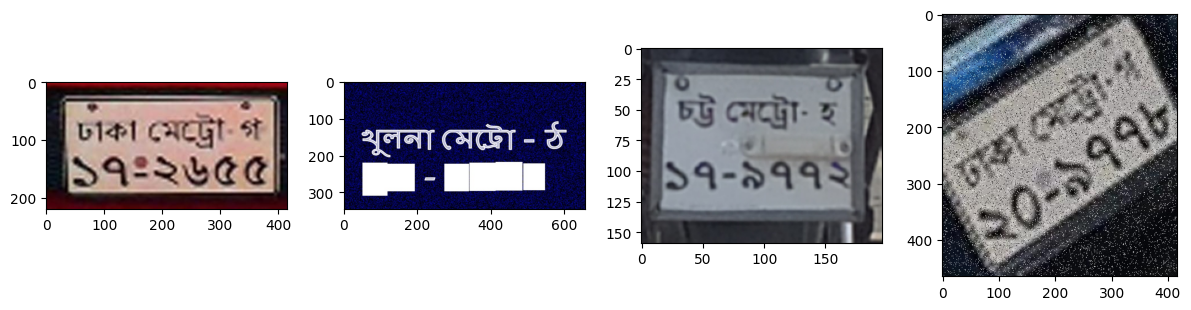

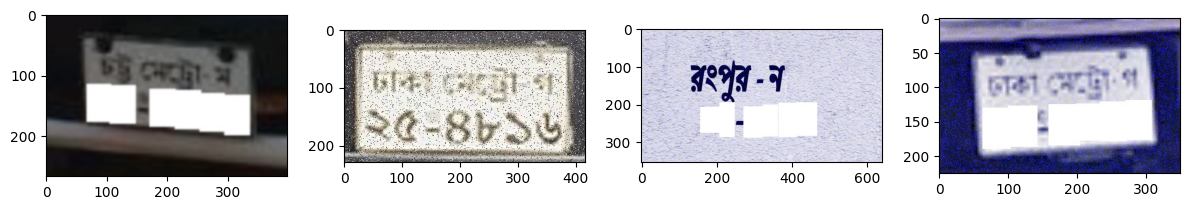

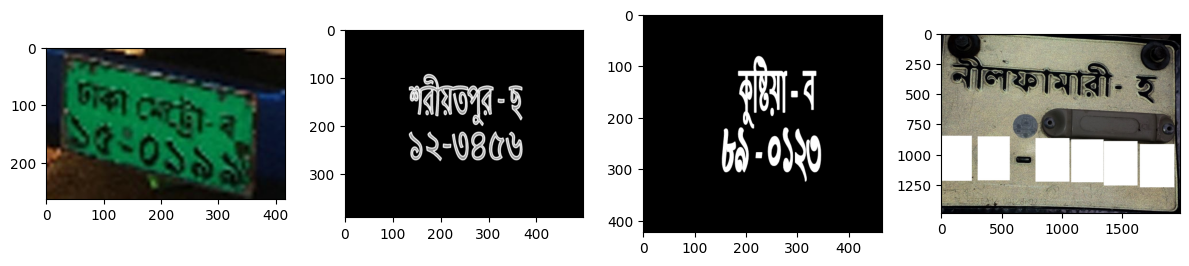

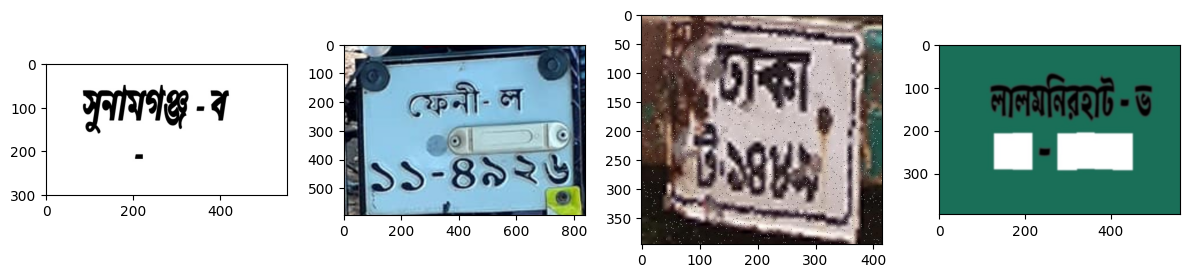

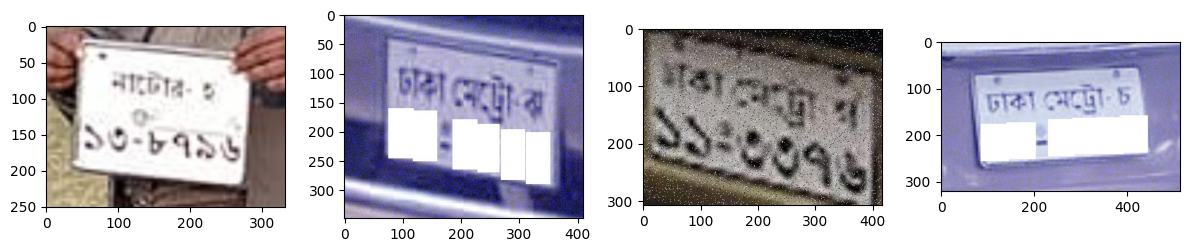

In [38]:
# Plot the 20 first car plates of the final train dataset
data_dir = "/content/drive/MyDrive/Dataset_plates/train/images/"
plots = []
k=0
for i in range(5):
    fig = plt.figure(figsize=(12, 15))
    for j in range(4):
        ax = plt.subplot2grid((5,4), (i,j))
        # Define filename
        filename = data_dir + timag_final[k+i]
        # Load image pixels
        image = imread(filename)
        # Plot raw pixel data
        plt.imshow(image)
        k=k+1
    plt.tight_layout()
    plt.show()


In [39]:
# Check if there are valid image duplicates
imagvhashes = pd.DataFrame(columns=["filename","hash"])
imagvhashes_dup = pd.DataFrame(columns=["filename","hash"])
data_dir = "/content/drive/MyDrive/Dataset_plates/valid/images/"
for filename in Path(data_dir).glob("*.jpg"):
  if filename.is_file():
    file_hash = hashfile(filename)
    if (imagvhashes["hash"] != file_hash).all():
      imagvhashes.loc[len(imagvhashes)] = [os.path.basename(filename), file_hash]
    else:
      imagvhashes_dup.loc[len(imagvhashes_dup)] = [os.path.basename(filename), file_hash]
if imagvhashes_dup.empty:
  print("Not valid images duplicates in the dataset.")
else:
    print(f'The number of duplicate valid images in the dataset is: {imagvhashes_dup.shape[0]}')

Not valid images duplicates in the dataset.


In [40]:
# Check the number of files for each folder
print(len(os.listdir("/content/drive/MyDrive/Dataset_plates/train/images")))
print(len(os.listdir("/content/drive/MyDrive/Dataset_plates/valid/images")))
print(len(os.listdir("/content/drive/MyDrive/Dataset_plates/test/images")))

print(len(os.listdir("/content/drive/MyDrive/Dataset_plates/train/labels")))
print(len(os.listdir("/content/drive/MyDrive/Dataset_plates/valid/labels")))
print(len(os.listdir("/content/drive/MyDrive/Dataset_plates/test/labels")))

12595
564
385
12595
564
385


In [44]:
#Create .yaml file
base_dir = "/content/drive/MyDrive/Dataset_plates"
classes_file_path = os.path.join("/content/bangla-license-plate-dataset-with-annotations", "classes.txt")
with open(classes_file_path, 'r') as file:
    class_labels = file.read().splitlines()
data = {
    'names': {i: label for i, label in enumerate(class_labels)},
    'train': os.path.join(base_dir, "train"),
    'test': os.path.join(base_dir, "test"),
    'val': os.path.join(base_dir, "valid")
}
yaml_file_path = os.path.join(base_dir, "dataset.yaml")
with open(yaml_file_path, 'w') as yaml_file:
    yaml.dump(data, yaml_file, default_flow_style=False)
print(f"YAML file '{yaml_file_path}' has been generated at: {os.path.abspath(yaml_file_path)}.")

YAML file '/content/drive/MyDrive/Dataset_plates/dataset.yaml' has been generated at: /content/drive/MyDrive/Dataset_plates/dataset.yaml.


In [45]:
# Start the YOLO model
model = YOLO("yolov8n.pt")  # load a pretrained model

100%|██████████| 6.25M/6.25M [00:00<00:00, 410MB/s]


In [46]:
# Display model information
model.info(detailed=True)

layer                                    name                type  gradient  parameters               shape        mu     sigma
    0                     model.0.conv.weight              Conv2d     False         432       [16, 3, 3, 3]  -0.00279     0.152        float32
    1                       model.0.bn.weight         BatchNorm2d     False          16                [16]      2.97      1.86        float32
    1                         model.0.bn.bias         BatchNorm2d     False          16                [16]     0.249      4.17        float32
    2                             model.0.act                SiLU     False           0                  []         -         -              -
    3                     model.1.conv.weight              Conv2d     False        4608      [32, 16, 3, 3]  -0.00012     0.063        float32
    4                       model.1.bn.weight         BatchNorm2d     False          32                [32]      5.02      1.12        float32
    4         

(129, 3157200, 0, 8.8575488)

The YOLO model was executed with different number of epochs (1, 2, 10, 20, 30) and different values of freeze (0, 12).

The chosen YOLO model for this car plates project has 30 epochs and freeze=0.

In [47]:
# Train the model
results = model.train(
    data="/content/drive/MyDrive/Dataset_plates/dataset.yaml",  # Ruta al archivo de configuración del dataset
    epochs=30,  # Número de épocas de entrenamiento
    imgsz=640,  # Tamaño de las imágenes
    batch=16,  # Tamaño del batch
    #freeze=12
)

Ultralytics 8.3.94 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/Dataset_plates/dataset.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, sh

100%|██████████| 755k/755k [00:00<00:00, 65.1MB/s]


Overriding model.yaml nc=80 with nc=102

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralyti

100%|██████████| 5.35M/5.35M [00:00<00:00, 332MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/Dataset_plates/train/labels... 12595 images, 3 backgrounds, 4 corrupt: 100%|██████████| 12595/12595 [00:08<00:00, 1493.07it/s]

train: WARNING ⚠️ /content/drive/MyDrive/Dataset_plates/train/images/1844.jpg: ignoring corrupt image/label: Label class 102 exceeds dataset class count 102. Possible class labels are 0-101
train: WARNING ⚠️ /content/drive/MyDrive/Dataset_plates/train/images/289.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/Dataset_plates/train/images/315.jpg: 2 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/Dataset_plates/train/images/320.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/Dataset_plates/train/images/325.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/Dataset_plates/train/images/327.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/Dataset_plates/train/images/331.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/Dataset_plates/train/images/335.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/Dataset_plates/train/images/blurn1

train: New cache created: /content/drive/MyDrive/Dataset_plates/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/Dataset_plates/valid/labels... 564 images, 0 backgrounds, 0 corrupt: 100%|██████████| 564/564 [00:00<00:00, 1100.46it/s]

val: WARNING ⚠️ /content/drive/MyDrive/Dataset_plates/valid/images/159.jpeg: 1 duplicate labels removed
val: WARNING ⚠️ /content/drive/MyDrive/Dataset_plates/valid/images/197.jpeg: 1 duplicate labels removed
val: WARNING ⚠️ /content/drive/MyDrive/Dataset_plates/valid/images/49.jpeg: 1 duplicate labels removed
val: New cache created: /content/drive/MyDrive/Dataset_plates/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=9.4e-05, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      2.42G      1.479      3.623      1.397        152        640: 100%|██████████| 787/787 [02:23<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.26it/s]


                   all        564       4862      0.887       0.22      0.276      0.185

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      6.02G       1.18      1.576      1.242        153        640: 100%|██████████| 787/787 [02:20<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.76it/s]


                   all        564       4862      0.761      0.354      0.437      0.295

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      6.02G      1.136      1.226      1.216        174        640: 100%|██████████| 787/787 [02:18<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.77it/s]


                   all        564       4862      0.595       0.57      0.583      0.411

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      6.02G      1.111      1.073        1.2        145        640: 100%|██████████| 787/787 [02:18<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.76it/s]


                   all        564       4862       0.83      0.579      0.741      0.519

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      6.02G       1.09     0.9705      1.187        180        640: 100%|██████████| 787/787 [02:18<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.72it/s]


                   all        564       4862      0.587      0.772      0.789      0.548

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      6.02G      1.085     0.8995      1.185        142        640: 100%|██████████| 787/787 [02:17<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.80it/s]


                   all        564       4862      0.797      0.747      0.831      0.587

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      6.02G      1.069     0.8341       1.17        119        640: 100%|██████████| 787/787 [02:18<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.92it/s]

                   all        564       4862       0.76      0.794      0.849      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      6.02G      1.061     0.7949      1.167        150        640: 100%|██████████| 787/787 [02:17<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.91it/s]

                   all        564       4862      0.769      0.828      0.868      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      6.02G      1.055     0.7639      1.163        113        640: 100%|██████████| 787/787 [02:18<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.91it/s]

                   all        564       4862      0.843      0.771      0.885      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      6.02G      1.038     0.7287      1.159        198        640: 100%|██████████| 787/787 [02:18<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.68it/s]

                   all        564       4862      0.815      0.813      0.889      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      6.02G      1.039     0.7127      1.157        147        640: 100%|██████████| 787/787 [02:17<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.73it/s]


                   all        564       4862      0.854      0.791       0.88      0.621

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      6.02G      1.032     0.6906      1.151        112        640: 100%|██████████| 787/787 [02:18<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.69it/s]

                   all        564       4862      0.821      0.848      0.893      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      6.02G      1.029     0.6739      1.151        148        640: 100%|██████████| 787/787 [02:18<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.72it/s]

                   all        564       4862      0.833      0.842      0.897      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      6.02G      1.019     0.6587      1.144         99        640: 100%|██████████| 787/787 [02:18<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.78it/s]


                   all        564       4862      0.839      0.841      0.884      0.612

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      6.03G      1.014     0.6453      1.143        169        640: 100%|██████████| 787/787 [02:18<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.74it/s]

                   all        564       4862      0.829      0.834      0.892      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      6.05G      1.006     0.6285      1.137        116        640: 100%|██████████| 787/787 [02:18<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.79it/s]

                   all        564       4862      0.815      0.854      0.899      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      6.07G      1.003     0.6198      1.135        120        640: 100%|██████████| 787/787 [02:18<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.75it/s]

                   all        564       4862      0.829      0.857      0.896      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      6.09G     0.9979     0.6097      1.132        147        640: 100%|██████████| 787/787 [02:18<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.81it/s]

                   all        564       4862      0.852      0.845      0.901      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      6.09G     0.9955     0.6058      1.135        121        640: 100%|██████████| 787/787 [02:18<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.90it/s]

                   all        564       4862      0.883      0.834        0.9      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      6.09G     0.9927     0.5964       1.13        174        640: 100%|██████████| 787/787 [02:17<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.90it/s]

                   all        564       4862      0.859      0.863      0.914       0.65


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      6.09G     0.9784     0.4949      1.167         81        640: 100%|██████████| 787/787 [02:15<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.85it/s]

                   all        564       4862      0.875       0.85      0.912      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      6.09G     0.9645     0.4748      1.163         64        640: 100%|██████████| 787/787 [02:15<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.83it/s]

                   all        564       4862      0.903       0.82      0.907      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      6.09G     0.9586     0.4657      1.158         61        640: 100%|██████████| 787/787 [02:15<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.73it/s]

                   all        564       4862      0.898       0.85       0.91      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      6.09G     0.9537     0.4602      1.157         79        640: 100%|██████████| 787/787 [02:15<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.84it/s]

                   all        564       4862      0.895      0.841      0.904      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      6.09G     0.9498     0.4546      1.153         85        640: 100%|██████████| 787/787 [02:16<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.92it/s]

                   all        564       4862       0.88      0.854      0.908      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      6.09G     0.9438     0.4485      1.148         91        640: 100%|██████████| 787/787 [02:15<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.87it/s]

                   all        564       4862      0.897      0.831      0.904      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      6.09G     0.9397     0.4444      1.148         86        640: 100%|██████████| 787/787 [02:15<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.82it/s]

                   all        564       4862      0.888      0.837      0.904      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      6.09G     0.9364     0.4415      1.145         75        640: 100%|██████████| 787/787 [02:15<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.71it/s]

                   all        564       4862      0.876      0.846        0.9      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      6.09G     0.9338     0.4383      1.144         98        640: 100%|██████████| 787/787 [02:15<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.82it/s]

                   all        564       4862      0.877      0.843      0.899       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      6.09G     0.9296     0.4355       1.14         73        640: 100%|██████████| 787/787 [02:15<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.94it/s]

                   all        564       4862      0.892      0.832      0.896      0.635



30 epochs completed in 1.176 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.9MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.9MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.94 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,341,330 parameters, 0 gradients, 9.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.05it/s]


                   all        564       4862      0.898       0.85       0.91      0.651
                     0        264        361      0.994      0.972      0.992      0.718
                     1        458        861      0.991       0.99      0.995      0.716
                     2        281        373      0.992      0.987      0.994      0.709
                     3        260        345      0.991      0.986      0.995      0.738
                     4        219        263       0.99       0.97      0.984      0.711
                     5        220        289      0.982      0.983      0.991      0.704
                     6        195        226      0.995      0.973      0.994       0.72
                     7        171        205          1       0.99      0.995      0.717
                     8        196        236      0.996      0.979      0.994      0.715
                     9        190        218      0.981      0.956      0.986      0.709
                 Metr

In [48]:
# Validate the model
metrics = model.val()
print(metrics.box.map)  # map50-95
print(metrics.box.map50)  # mAP50
print(metrics.box.map75)  # mAP75
print(metrics.box.maps)  # list of mAP50-95 for each category
print(metrics.box.p) # P (Precision): The accuracy of the detected objects, indicating how many detections were correct
print(metrics.box.r) # R (Recall): The ability of the model to identify all instances of objects in the images.

Ultralytics 8.3.94 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,341,330 parameters, 0 gradients, 9.6 GFLOPs


val: Scanning /content/drive/MyDrive/Dataset_plates/valid/labels.cache... 564 images, 0 backgrounds, 0 corrupt: 100%|██████████| 564/564 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/drive/MyDrive/Dataset_plates/valid/images/159.jpeg: 1 duplicate labels removed
val: WARNING ⚠️ /content/drive/MyDrive/Dataset_plates/valid/images/197.jpeg: 1 duplicate labels removed
val: WARNING ⚠️ /content/drive/MyDrive/Dataset_plates/valid/images/49.jpeg: 1 duplicate labels removed



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:05<00:00,  6.69it/s]


                   all        564       4862      0.868      0.859      0.907      0.649
                     0        264        361      0.994      0.974      0.991      0.714
                     1        458        861      0.987       0.99      0.995      0.716
                     2        281        373      0.989      0.989      0.994      0.708
                     3        260        345      0.988      0.986      0.994      0.738
                     4        219        263      0.988      0.976      0.984      0.713
                     5        220        289      0.982       0.99      0.991      0.706
                     6        195        226       0.99      0.973      0.994       0.72
                     7        171        205      0.999      0.995      0.995      0.716
                     8        196        236      0.996      0.981      0.994      0.716
                     9        190        218      0.982      0.954      0.986      0.709
                 Metr

In [49]:
print(model.names)

{0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'Metro', 11: 'A', 12: 'Bha', 13: 'Cha', 14: 'Chha', 15: 'Da', 16: 'DA', 17: 'E', 18: 'Ga', 19: 'Gha', 20: 'Ha', 21: 'Ja', 22: 'Jha', 23: 'Ka', 24: 'Kha', 25: 'La', 26: 'Ma', 27: 'Na', 28: 'Pa', 29: 'Sa', 30: 'Sha', 31: 'Ta', 32: 'THA', 33: 'Tha', 34: 'U', 35: 'Bagerhat', 36: 'Bagura', 37: 'Bandarban', 38: 'Barguna', 39: 'Barisal', 40: 'Bhola', 41: 'Brahmanbaria', 42: 'Chandpur', 43: 'Chapainawabganj', 44: 'Chatto', 45: 'Chattogram', 46: 'Chuadanga', 47: "Cox's Bazar", 48: 'Cumilla', 49: 'Dhaka', 50: 'Dinajpur', 51: 'Faridpur', 52: 'Feni', 53: 'Gaibandha', 54: 'Gazipur', 55: 'Gopalganj', 56: 'Habiganj', 57: 'Jamalpur', 58: 'Jessore', 59: 'Jhalokati', 60: 'Jhenaidah', 61: 'Joypurhat', 62: 'Khagrachari', 63: 'Khulna', 64: 'Kishoreganj', 65: 'Kurigram', 66: 'Kustia', 67: 'Lakshmipur', 68: 'Lalmonirhat', 69: 'Madaripur', 70: 'Magura', 71: 'Manikganj', 72: 'Meherpur', 73: 'Moulvibazar', 74: 'Mymensingh', 75:

The car plate 2523.jpg has 8 characters: 90 25 0 6 5 0 1 1 (Rangamati La 0 6 5 0 1 1)

In [51]:
# Load the best train model
model = YOLO("/content/runs/detect/train/weights/best.pt")

In [52]:
# Predict with the model a test image
results=model.predict("/content/drive/MyDrive/Dataset_plates/test/images/2523.jpg", imgsz=640, show=True)
# Access the results
for result in results:
  xywh = result.boxes.xywh  # center-x, center-y, width, height
  xywhn = result.boxes.xywhn  # normalized
  xyxy = result.boxes.xyxy  # top-left-x, top-left-y, bottom-right-x, bottom-right-y
  xyxyn = result.boxes.xyxyn  # normalized
  names = [result.names[cls.item()] for cls in result.boxes.cls.int()]  # class name of each box
  confs = result.boxes.conf  # confidence score of each box
  print(names)
# Iterate over the results
for result in results:
    for box in result.boxes:
        text = result.names[int(box.cls[0])]  # Character detected
        print(text)

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()


image 1/1 /content/drive/MyDrive/Dataset_plates/test/images/2523.jpg: 512x640 2 0s, 2 1s, 1 5, 1 6, 1 La, 1 Rangamati, 42.9ms
Speed: 2.9ms preprocess, 42.9ms inference, 1.5ms postprocess per image at shape (1, 3, 512, 640)
['6', 'La', '1', '5', '0', '0', '1', 'Rangamati']
6
La
1
5
0
0
1
Rangamati



0: 512x640 2 0s, 2 1s, 1 5, 1 6, 1 La, 1 Rangamati, 7.3ms
Speed: 2.8ms preprocess, 7.3ms inference, 1.3ms postprocess per image at shape (1, 3, 512, 640)


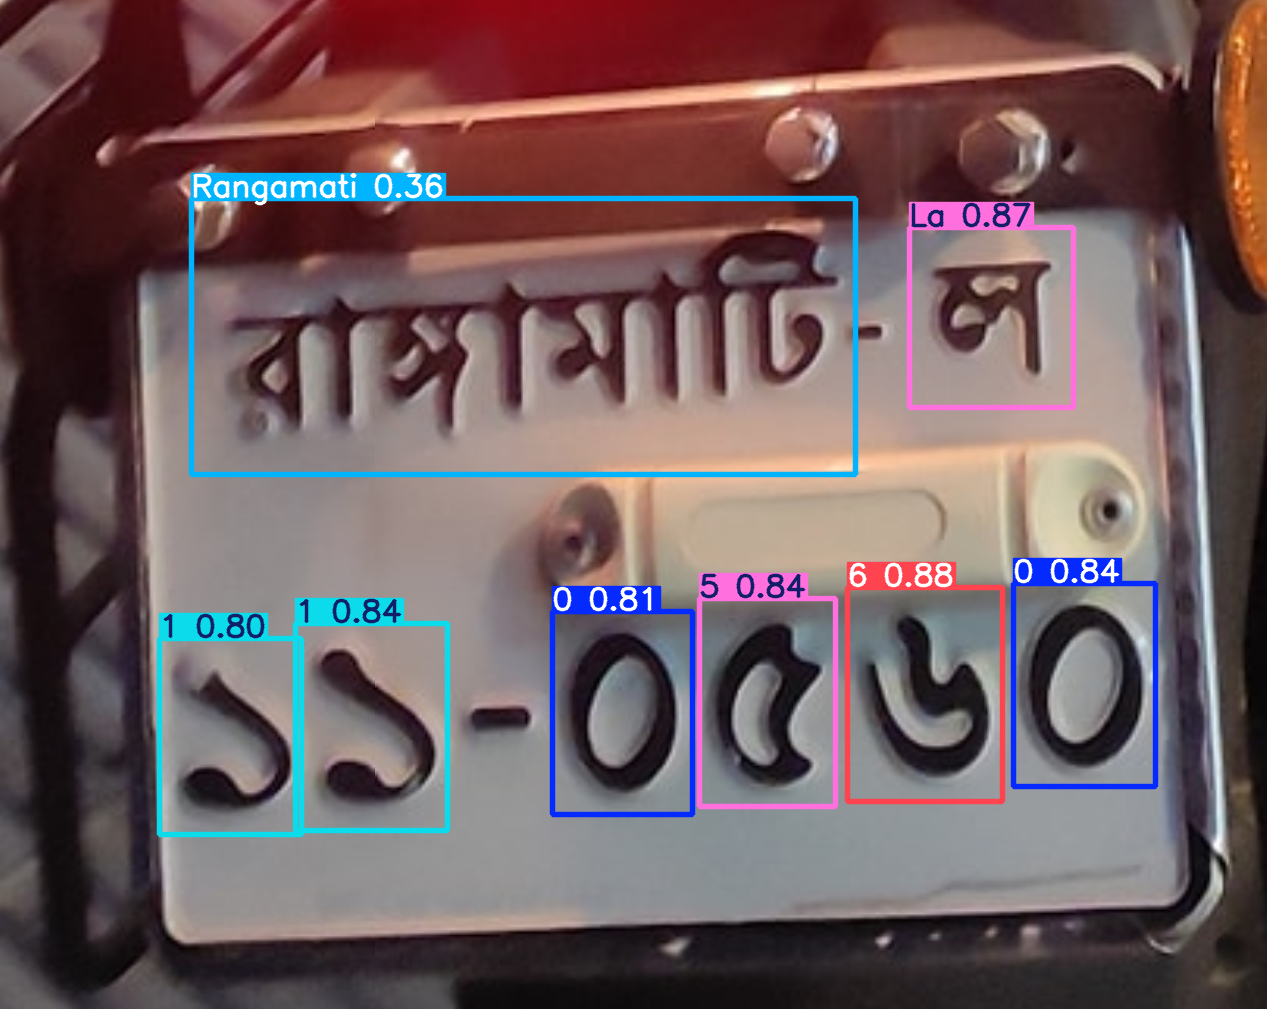

In [53]:
# Results for a test image
results = model(["/content/drive/MyDrive/Dataset_plates/test/images/2523.jpg"])  # return a list of Results objects
# Process results list
for result in results:
  boxes = result.boxes  # Boxes object for bounding box outputs
  masks = result.masks  # Masks object for segmentation masks outputs
  keypoints = result.keypoints  # Keypoints object for pose outputs
  probs = result.probs  # Probs object for classification outputs
  obb = result.obb  # Oriented boxes object for OBB outputs
  result.show()  # display to screen
  result.save(filename="result.jpg")  # save to disk

In [54]:
# Download the best train YOLO model
files.download('/content/runs/detect/train/weights/best.pt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>